# Step 1: Import Libraries and Reading Data
## 步驟一：匯入套件並讀取資料

## 1.1 Import Libraries
## 1.1 匯入基本套件

In [1]:
#access to system parameters
import sys
print("Python version: {}". format(sys.version))

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# DataFrame operations
import pandas as pd
pd.set_option('display.max_columns', 200)
print("pandas version: {}". format(pd.__version__))

# NumPy
import numpy as np
print("NumPy version: {}". format(np.__version__))

#Machine learning algorithms
import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))

#Data visualization
import seaborn as sns
print("seaborn version: {}". format(sns.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}". format(matplotlib.__version__))

#Misc libraries
import time

print('-'*25)
from subprocess import check_output
print(check_output(["ls", "../input/titanic"]).decode("utf8"))

Python version: 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]
pandas version: 1.5.3
NumPy version: 1.23.5
scikit-learn version: 1.2.2
seaborn version: 0.12.2
matplotlib version: 3.7.2
-------------------------
gender_submission.csv
test.csv
train.csv



## 1.2 Import Machine Learning Model Algorithms Libraries
## 1.2 匯入機器學習模型套件

In [2]:
#Model algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Model helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [3]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

data_cleaner = [train_data, test_data]

# Step 2: Analyze Data
## 步驟二：分析數據

## 2.1 Descriptive Statistics of Data.
## 2.1 資料描述性統計

In [4]:
print('train_data: {}'.format(train_data.shape))
print('test_data: {}'.format(test_data.shape))

train_data: (891, 12)
test_data: (418, 11)


In [5]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
print('Train columns with null values:\n', train_data.isnull().sum())
print('-'*10)
print('Test columns with null values:\n', test_data.isnull().sum())

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 2.2 Clean Data
## 2.2 數據清理

In [9]:
#complete or delete missing values in train and test dataset
for dataset in data_cleaner:
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    
    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    
    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)

#delete the cabin feature/column and others previously stated to exclude in train dataset
train_data.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1, inplace=True)
test_data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
print('Train columns with null values:\n', train_data.isnull().sum())
print('-'*10)
print('Test columns with null values:\n', test_data.isnull().sum())

Train columns with null values:
 Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
Test columns with null values:
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


## 2.3 Feature Engineering
## 2.3 特徵工程

## FamilySize

In [10]:
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

## IsAlone

In [11]:
for dataset in data_cleaner:
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0

## FareBin

In [12]:
for dataset in data_cleaner:
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

## AgeBin

In [13]:
for dataset in data_cleaner:
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

## Name

In [14]:
for dataset in data_cleaner:
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
print('Train_data \n', train_data['Title'].value_counts())
print('-'*10)
print('Test_data \n', test_data['Title'].value_counts())

Train_data 
 Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64
----------
Test_data 
 Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [15]:
for dataset in data_cleaner:
    stat_min = 10
    title_names = (dataset['Title'].value_counts() < stat_min)

    dataset['Title'] = dataset['Title'].apply(lambda x: 'Misc' if title_names.loc[x]==True else x)
print('Train_data \n', train_data['Title'].value_counts())
print('-'*10)
print('Test_data \n', test_data['Title'].value_counts())
print('-'*10)
train_data.info()
test_data.info()
train_data.sample(10)

Train_data 
 Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
Test_data 
 Mr        240
Miss       78
Mrs        72
Master     21
Misc        7
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  FareBin     891 non-null    category
 12  AgeBin      891 non-null    category
 13  Title       891 non-n

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,FareBin,AgeBin,Title
120,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,73.5000,S,3,0,"(31.0, 512.329]","(16.0, 32.0]",Mr
794,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,7.8958,S,1,1,"(-0.001, 7.91]","(16.0, 32.0]",Mr
100,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,7.8958,S,1,1,"(-0.001, 7.91]","(16.0, 32.0]",Miss
816,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,7.9250,S,1,1,"(7.91, 14.454]","(16.0, 32.0]",Miss
154,0,3,"Olsen, Mr. Ole Martin",male,28.0,0,0,7.3125,S,1,1,"(-0.001, 7.91]","(16.0, 32.0]",Mr
390,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,120.0000,S,4,0,"(31.0, 512.329]","(32.0, 48.0]",Mr
355,0,3,"Vanden Steen, Mr. Leo Peter",male,28.0,0,0,9.5000,S,1,1,"(7.91, 14.454]","(16.0, 32.0]",Mr
310,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,83.1583,C,1,1,"(31.0, 512.329]","(16.0, 32.0]",Miss
358,1,3,"McGovern, Miss. Mary",female,28.0,0,0,7.8792,Q,1,1,"(-0.001, 7.91]","(16.0, 32.0]",Miss
652,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8.4333,S,1,1,"(7.91, 14.454]","(16.0, 32.0]",Mr


## 2.4 Feature Transform
## 2.4 特徵轉換

In [16]:
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    
Target = ['Survived']

train_data_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
train_data_xy_bin = Target + train_data_x_bin
print('Bin X Y: ', train_data_xy_bin, '\n')
train_data[train_data_xy_bin].head(5)

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 



,Survived,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
0,0,1,3,2,3,2,1,0
1,1,0,1,0,4,2,2,3
2,1,0,3,2,2,1,1,1
3,1,0,1,2,4,2,2,3
4,0,1,3,2,3,1,2,1


## 2.5 The impact of features on survival
## 2.5 特徵對生存的影響

## Pclass

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


<Axes: xlabel='Pclass', ylabel='count'>

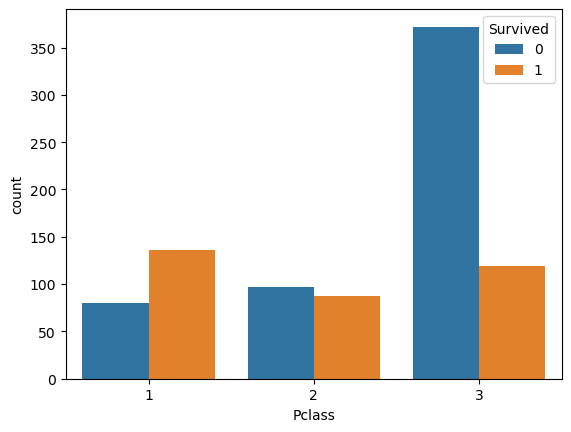

In [17]:
print (train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
sns.countplot(data=train_data, x='Pclass', hue='Survived')

## Sex

      Sex  Survived
0  female  0.742038
1    male  0.188908


<Axes: xlabel='Sex', ylabel='count'>

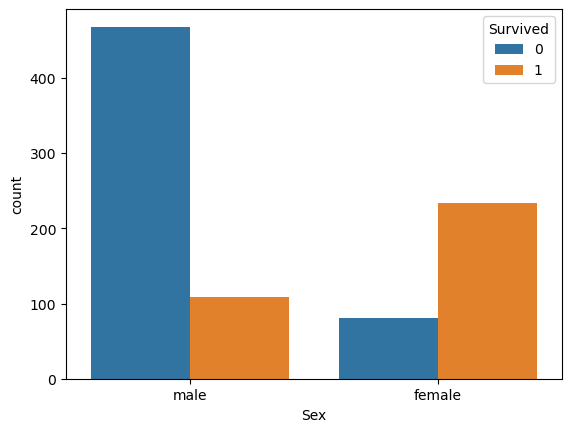

In [18]:
print (train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())
sns.countplot(data=train_data, x='Sex', hue='Survived')

## Embarked

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


<Axes: xlabel='Embarked', ylabel='count'>

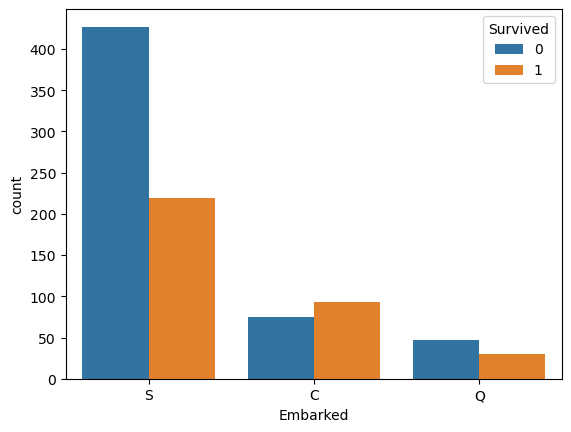

In [19]:
print (train_data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean())
sns.countplot(data=train_data, x='Embarked', hue='Survived')

## Title

    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000


<Axes: xlabel='Title', ylabel='count'>

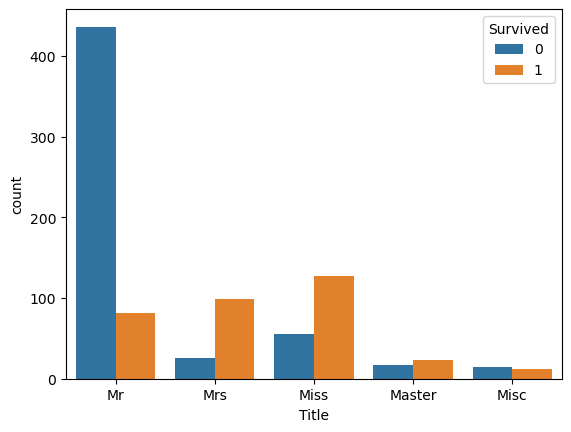

In [20]:
print (train_data[["Title", "Survived"]].groupby(['Title'], as_index=False).mean())
sns.countplot(data=train_data, x='Title', hue='Survived')

## FamilySize

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


<Axes: xlabel='FamilySize', ylabel='count'>

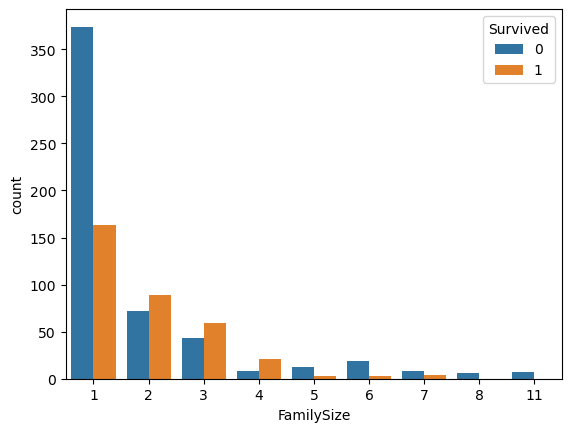

In [21]:
print (train_data[["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean())
sns.countplot(data=train_data, x='FamilySize', hue='Survived')

## AgeBin

          AgeBin  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


<Axes: xlabel='AgeBin', ylabel='count'>

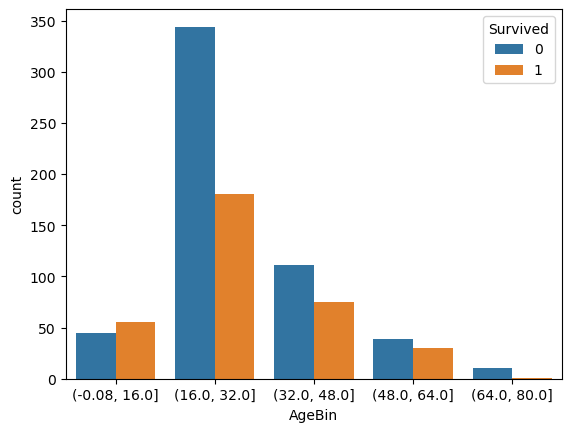

In [22]:
print (train_data[["AgeBin", "Survived"]].groupby(['AgeBin'], as_index=False).mean())
sns.countplot(data=train_data, x='AgeBin', hue='Survived')

## FareBin

           FareBin  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


<Axes: xlabel='FareBin', ylabel='count'>

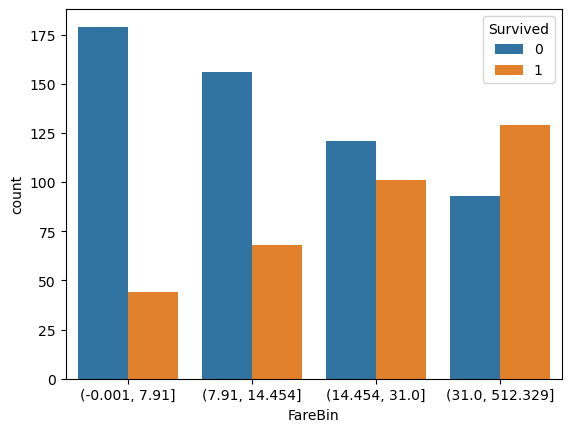

In [23]:
print (train_data[["FareBin", "Survived"]].groupby(['FareBin'], as_index=False).mean())
sns.countplot(data=train_data, x='FareBin', hue='Survived')

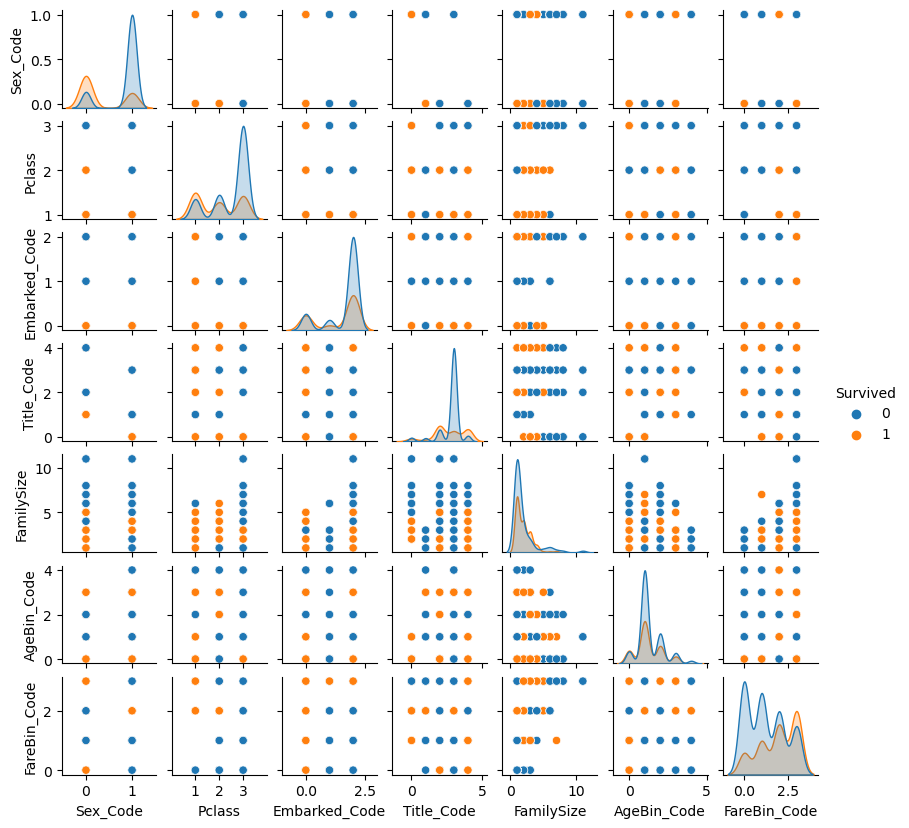

In [24]:
#pair plots of dataset
sns.pairplot(train_data[train_data_xy_bin], hue = 'Survived', size=1.2)

<Axes: >

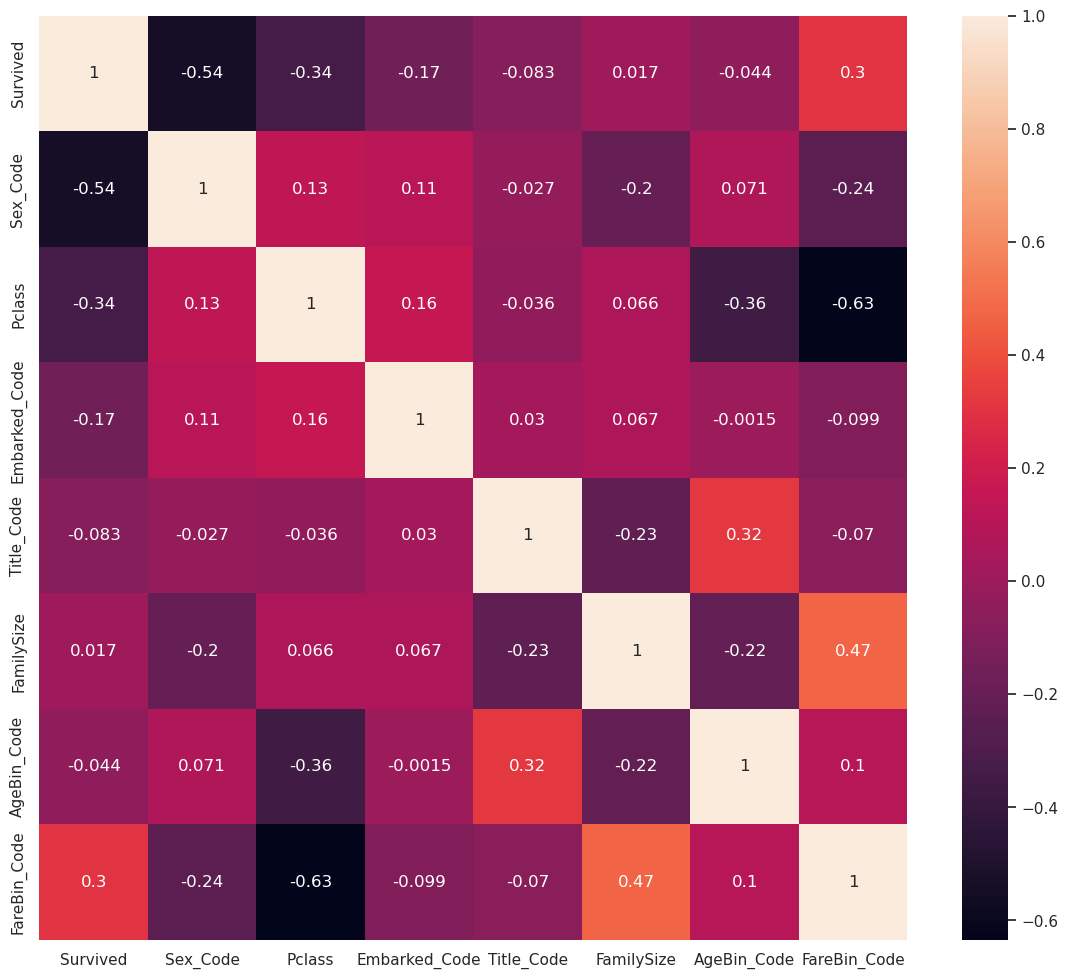

In [25]:
#correlation heatmap of dataset
sns.set(rc = {'figure.figsize':(14, 12)})
sns.heatmap(train_data[train_data_xy_bin].corr(), annot=True, annot_kws={'fontsize':12})

# Step 3: MODELING
## 步驟三：模型

## 3.1 Classifier Comparison
## 3.1 分類器比較

In [26]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #XGBoost
    XGBClassifier(),
    
    #LightGBM
    LGBMClassifier()
]

folds = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=8)

MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:

    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    cv_results = model_selection.cross_validate(alg, train_data[train_data_x_bin], train_data[Target], cv  = folds, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3

    alg.fit(train_data[train_data_x_bin], train_data[Target])

    row_index+=1
        
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
13,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.834894,0.832884,0.123442,0.097604
14,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.833646,0.830637,0.117841,0.113703
21,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",0.872803,0.828315,0.133585,0.379197
2,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.857464,0.821635,0.148976,0.110668
19,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.825166,0.819426,0.146641,0.003349
3,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.889139,0.818215,0.088195,0.201502
1,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.889139,0.815993,0.118842,0.168727
20,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",0.884027,0.81598,0.144922,0.083721
16,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.889139,0.813733,0.117221,0.003872
4,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.864572,0.812647,0.124737,0.5349


Text(0, 0.5, 'Algorithm')

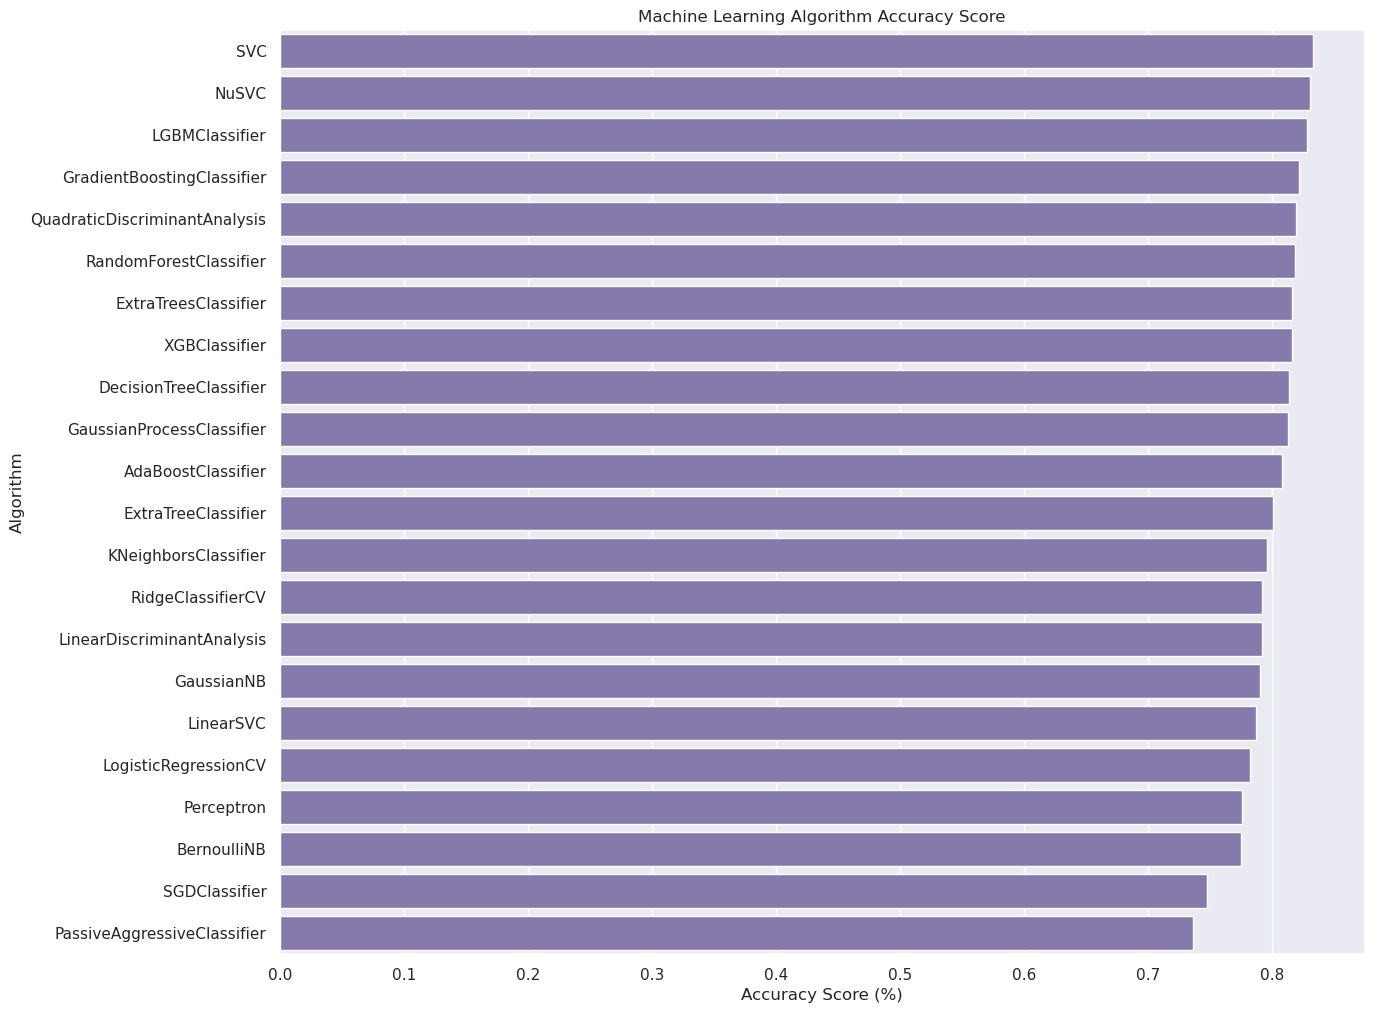

In [27]:
g = sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

g.set_title('Machine Learning Algorithm Accuracy Score')
g.set_xlabel('Accuracy Score (%)')
g.set_ylabel('Algorithm')

## 3.2 Feature importance of tree based classifiers
## 3.2 決策樹的特徵重要性

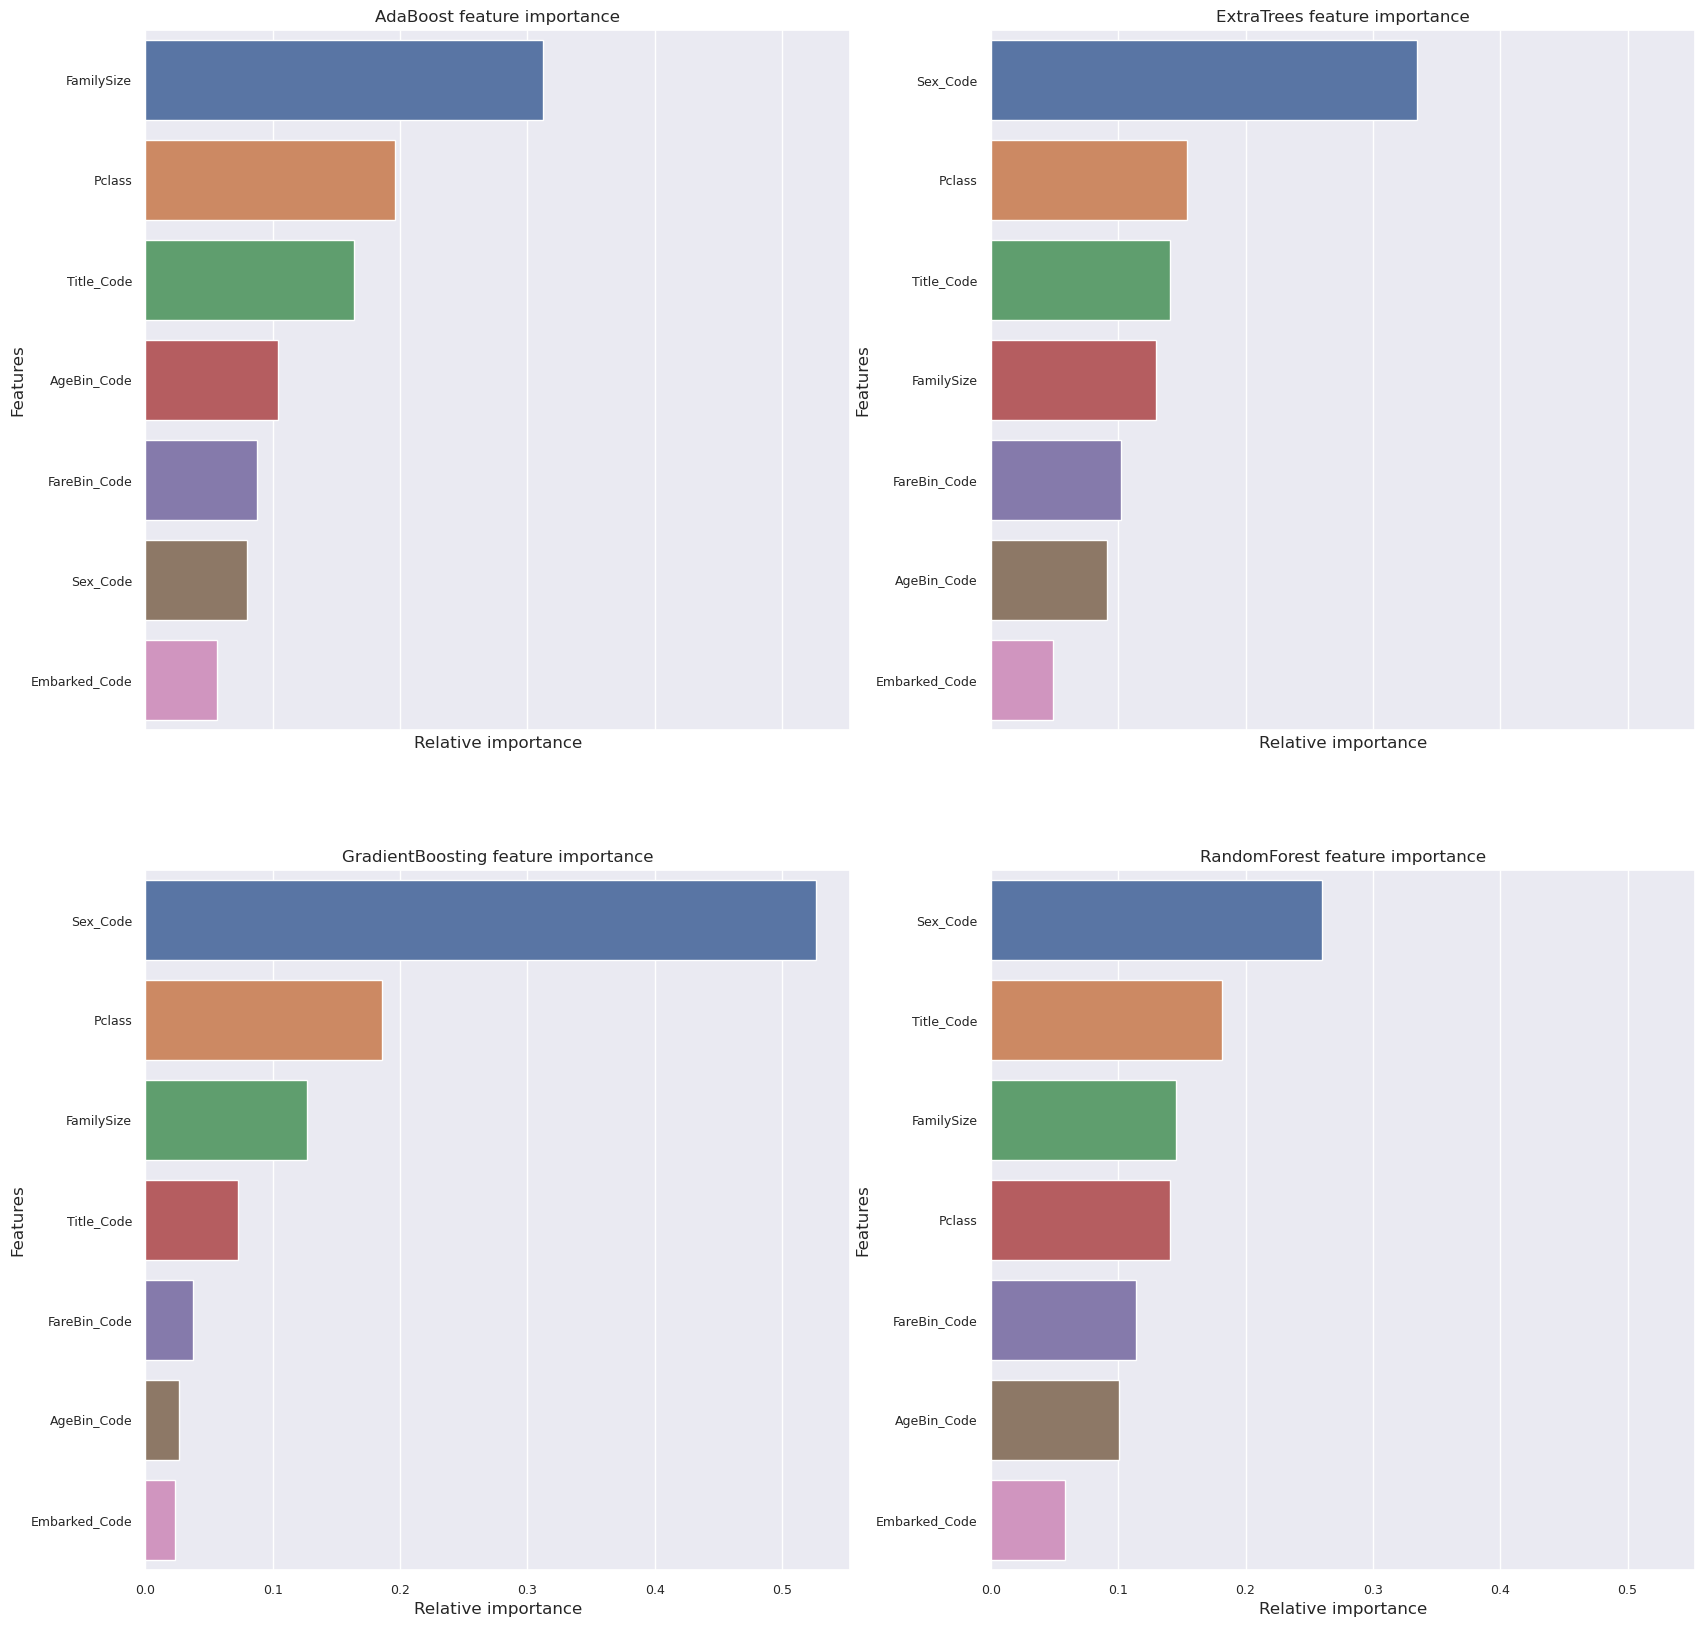

In [28]:
ensemble_model = [
    #Ensemble Methods
    ('AdaBoost', ensemble.AdaBoostClassifier()),
    ('ExtraTrees', ensemble.ExtraTreesClassifier()),
    ('GradientBoosting', ensemble.GradientBoostingClassifier()),
    ('RandomForest', ensemble.RandomForestClassifier()),
]

model_feature_import = []
for model in ensemble_model:
    cv_results = model_selection.cross_validate(model[1], train_data[train_data_x_bin], train_data[Target], return_train_score=True,  return_estimator=True)
    model_feature_import.append((model[0], np.array([feature.feature_importances_ for feature in cv_results['estimator']]).mean(axis=0)))

nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(20,20))
nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = model_feature_import[nclassifier][0]
        classifier = model_feature_import[nclassifier][1]
        indices = np.argsort(classifier)[::-1]
        g = sns.barplot(y=train_data[train_data_x_bin].columns[indices],x = classifier[indices] ,orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

## 3.3 Hyperparameter tunning for best models
## 3.3 模型超參數調整

In [29]:
grid_n_estimator = [10, 30 ,50]
grid_learn = [.01, .1, 1]
grid_ratio = [.1, .5, 1.0]
grid_max_depth = [1, 5, 10,]
grid_max_samples = [.5, .75, .1]
grid_seed = [8]

vote_est = [
    #Ensemble Methods
    ('gbc', ensemble.GradientBoostingClassifier()),
    
    #SVM
    ('svc', svm.SVC(probability=True)),
    ('nusvc', svm.NuSVC(probability=True)),
    
    #LightGBM
    ('lgb', LGBMClassifier())
]

grid_param = [
            [{
            #GradientBoosting
            'loss': ['log_loss', 'exponential'],
            'subsample': grid_max_samples,
            'criterion': ['friedman', 'squared_error'],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'learning_rate': grid_learn, 
            'n_estimators': grid_n_estimator,
            'max_depth': grid_max_depth,  
            'random_state': grid_seed
             }],
                
            [{
            #SVC
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'sigmoid'],
            'gamma': grid_ratio,
            'degree': [2, 3, 4],
            'decision_function_shape': ['ovo', 'ovr'],
            'probability': [True],
            'random_state': grid_seed
            }],
    
            [{
            #NuSVC
            'nu': [.1, .3, .5],
            'kernel': ['linear', 'rbf', 'sigmoid'],
            'gamma': grid_ratio,
            'degree': [2, 3, 4],
            'decision_function_shape': ['ovo', 'ovr'],
            'probability': [True],
            'random_state': grid_seed
            }],
    
            [{
            #LGBMClassifier
            'num_leaves':[3, 10, 20],
            'learning_rate': grid_learn,
            'min_child_samples': [10, 50, 100],
            'subsample': grid_max_samples,
            'reg_alpha': grid_ratio,
            'max_depth': [3, 5, 10],
            'num_iterations': grid_n_estimator,
            }]
]

MLA_predict = train_data[Target]
start_total = time.perf_counter()
for clf, param in zip (vote_est, grid_param):
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = folds, scoring = 'roc_auc')
    best_search.fit(train_data[train_data_x_bin], train_data[Target])
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param)
    
    MLA_predict[clf[0]] = best_search.best_estimator_.predict(train_data[train_data_x_bin])
    
run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

The best parameter for GradientBoostingClassifier is {'criterion': 'squared_error', 'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 8, 'subsample': 0.75} with a runtime of 968.95 seconds.
The best parameter for SVC is {'C': 0.1, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True, 'random_state': 8} with a runtime of 215.15 seconds.
The best parameter for NuSVC is {'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 0.1, 'kernel': 'linear', 'nu': 0.5, 'probability': True, 'random_state': 8} with a runtime of 139.25 seconds.
The best parameter for LGBMClassifier is {'learning_rate': 0.1, 'max_depth': 10, 'min_child_samples': 10, 'num_iterations': 30, 'num_leaves': 20, 'reg_alpha': 0.5, 'subsample': 0.5} with a runtime of 977.79 seconds.
Total optimization time was 38.35 minutes.


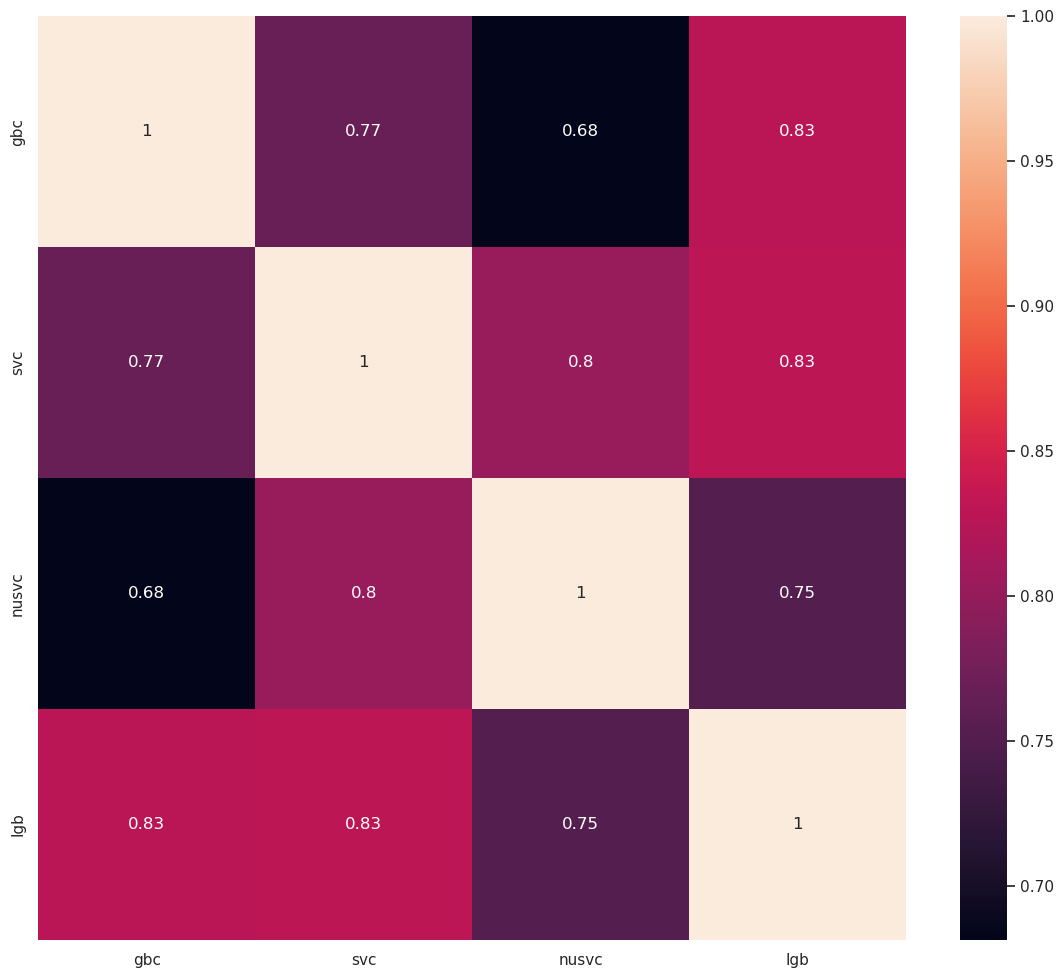

In [30]:
# Concatenate all classifier results
g = sns.heatmap(MLA_predict[MLA_predict.columns[1:]].corr(), annot=True)

## 3.4 Ensemble modeling
## 3.4 集成學習

In [31]:
#Hard Vote or majority rules w/Tuned Hyperparameters
grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, train_data[train_data_x_bin], train_data[Target], cv  = folds, return_train_score=True)
grid_hard.fit(train_data[train_data_x_bin], train_data[Target])

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, train_data[train_data_x_bin], train_data[Target], cv  = folds, return_train_score=True)
grid_soft.fit(train_data[train_data_x_bin], train_data[Target])

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 84.56
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 82.95
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 13.97
----------
Soft Voting w/Tuned Hyperparameters Training w/bin score mean: 83.59
Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 83.18
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 12.67
----------


## 3.5 Prediction
## 3.5 預測

In [33]:
test_data['Survived'] = grid_soft.predict(test_data[train_data_x_bin])
submit = test_data[['PassengerId','Survived']]
submit.to_csv("./submit.csv", index=False)
print('Validation Data Distribution: \n', test_data['Survived'].value_counts(normalize = True))
submit

Validation Data Distribution: 
 0    0.61244
1    0.38756
Name: Survived, dtype: float64


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
